**INTRODUCCION**

El termino regresion lineal es muy conocido en una amplia gama de disciplinas por su  utilidad para resolver
problemas de indole estadistico.En la actualidad debido a la gran importancia que esta adquiriendo la ciencia
de datos a tomado mayor importancia dado que la regeresion lineal  es un algoritmo muy utilizado en machine
machine learning y  estadistica. En el presente documento realizaremos una breve historia y explicacion del funcionamiento  de este algoritmo asi como un ejemplo practico.Realizaremos la implementacion de este ejemplo
con la ayuda del lenguaje de programacion Python el cual por ser un software libre a permitido apoyado por las comunidades un avance mucho mas rapido en la creacion de codigo.

**BREVE HISTORIA**



Los primeros documentos que se conocen a cerca de regresiones lineales fueron escritos por [LambertAdolphe-Jacques Quetelet](https://es.wikipedia.org/wiki/Adolphe_Quetelet),quien sus aportaciones sobre la correlación y regresión se originan desde sus estudios sobre el hombre medio, estimando empíricamente las medias y desviaciones típicas de medidas antropométricas que,suponía, dependen de varias variables independientes tales como el sexo, edad, profesión o nivel de educación.

Las ideas modernas sobre regresión se originan en los trabajo de [Legendre](https://es.wikipedia.org/wiki/Adrien-Marie_Legendre) en 1805 quien documento del metodo de minimos cuadrados el cual consiste en un criterio de optimizacion con el criterio de minimo error cuadratico.

Posteriormente en 1829 Gauss fue capaz de establecer la razón por la cual este procedimiento es muy adecuado desde el punto de vista estadístico, mediante lo que hoy se conoce como [teorema de Gauss-Markov](https://es.wikipedia.org/wiki/Teorema_de_Gauss-M%C3%A1rkov).

Hoy en dia la regresion lineal se utiliza como un algoritmo de aprendizaje supervisado que se utiliza en machine learning utilizando el metodo del descenso de gradiante como algoritmo de optimizacion.


**PLANTEAMIENTO DEL ALGORITMO**


La regresion lineal es un modelo matematico usado para aproximar la relacion de dependencia entre una variable
dependientes **Y**  y **m** variable independientes **X**i, este modelo puede ser expresado como:

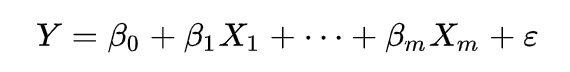

Donde 

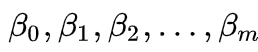

Son los parametros del modelo

Con la regresion lo que buscamos es encontrar los parametros **beta** tal que la ecuacion quede completamente
especificada.

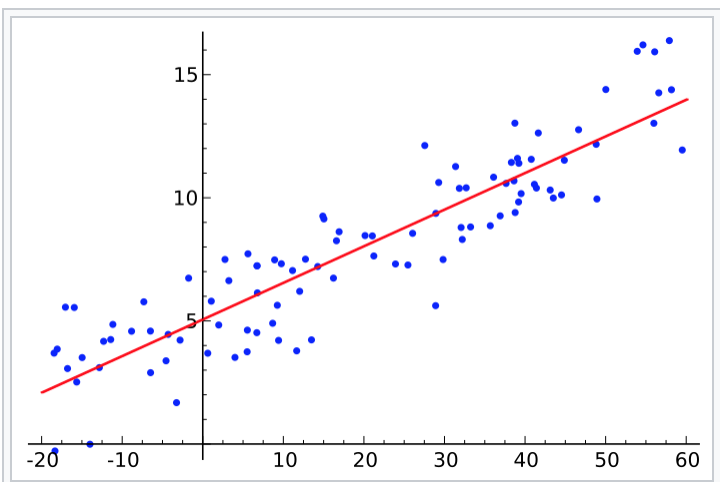

 Figura 1. Grafica de una regresion lineal(linea  Roja el modelo)

Para explicar la forma como se encuentran estos parametros **beta** tomemos una regresion lineal simple la cual
se presenta en la siguiente ecuacion:

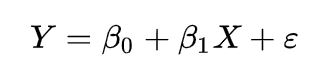

Vamos a encontrar estos parametros utilizando el metodo conocido como **minimos cuadrados** que consiste en **minimizar** la suma de las diferencias al cuadrado entre las observaciones **Y**i   y   la recta de regresion. Esta  funcion que representa las sumas de estas diferencias al cuadrado se conocen como la **funcion de error cuadratico** y la representamos de la siguiente forma: 

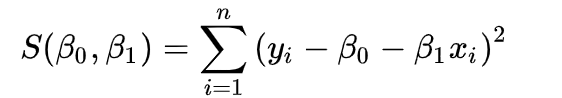

Esta funcion cuadratica obtiene su minimo el los puntos de **beta**0  y **beta**1 en los cuales la derivadas parcial
evaluadas en estos puntos se haga cero. 

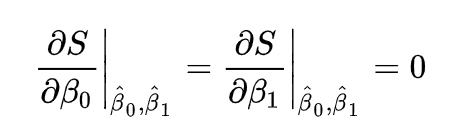

Al realizar estas derivadas  a la funcion tambien conocida como de coste obtenemos lo siguiente:

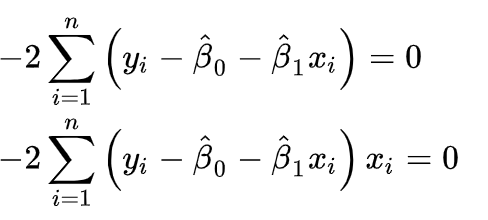

In [ ]:
La solucion a este sistemas de ecuaciones se puede expresar de la siguiente forma:

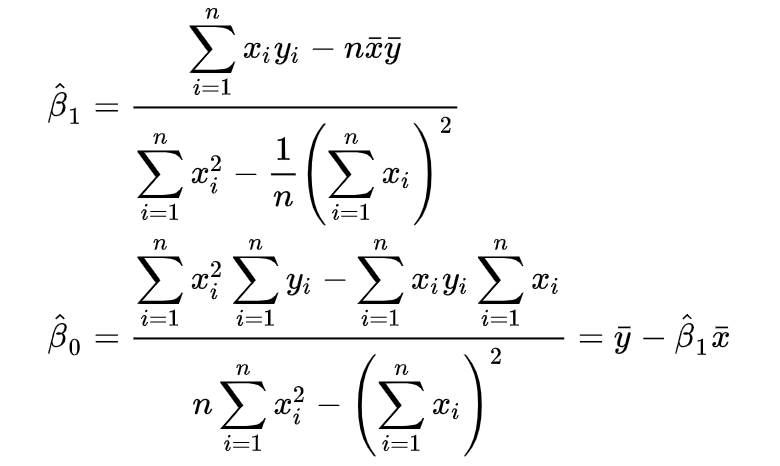

Uno de los metodos computacionales mas conocidos para resolver este problema de optimizacion es el llamado
**metodo descenso del gradiante** es un algoritmo de optimización que permite converger hacia el valor mínimo de una función mediante un proceso iterativo. a continuacion explicaremos este metodo y se presentara un codigo en Python para ilustrar este metodo.

Inicialmente se crea un conjunto de datos de para el entrenamiento En las primeras líneas se crea un conjunto de 
datos en la que los puntos se corresponde con una recta de parámetros 2 y 3 al que se ha añadido ruido aleatorio.



[-2.   -1.96 -1.92 -1.88 -1.84 -1.8  -1.76 -1.72 -1.68 -1.64 -1.6  -1.56
 -1.52 -1.48 -1.44 -1.4  -1.36 -1.32 -1.28 -1.24 -1.2  -1.16 -1.12 -1.08
 -1.04 -1.   -0.96 -0.92 -0.88 -0.84 -0.8  -0.76 -0.72 -0.68 -0.64 -0.6
 -0.56 -0.52 -0.48 -0.44 -0.4  -0.36 -0.32 -0.28 -0.24 -0.2  -0.16 -0.12
 -0.08 -0.04  0.    0.04  0.08  0.12  0.16  0.2   0.24  0.28  0.32  0.36
  0.4   0.44  0.48  0.52  0.56  0.6   0.64  0.68  0.72  0.76  0.8   0.84
  0.88  0.92  0.96  1.    1.04  1.08  1.12  1.16  1.2   1.24  1.28  1.32
  1.36  1.4   1.44  1.48  1.52  1.56  1.6   1.64  1.68  1.72  1.76  1.8
  1.84  1.88  1.92  1.96  2.  ] [-0.63835923 -0.60388663 -0.44355479 -0.56248022 -0.67504455 -0.67173556
 -0.35166983 -0.54782288 -0.06542926 -0.22843909 -0.70405902 -0.61311309
  0.0540082   0.27505024  0.19003809 -0.313374    0.68029234 -0.16698198
  0.34209227  0.11808221  0.699172    0.73371608  1.14415518  1.11516573
 -0.08864286  1.34415026  1.10596626  1.47276924  1.15268261  1.07664802
  1.39529375  1.67732

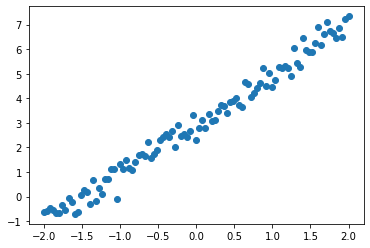

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Creación de un conjunto de datos para entrenamiento

X = np.linspace(-2, 2, 101)
Y = 3 + 2 * X + np.random.randn(*X.shape) * 0.33
plt.plot(X,Y,'o')
print(X,Y)



Posteriormente se define el número máximo de veces que se va a iterar(num_steps), la radio de aprendizaje(learningRate), el criterio de parada(criteria) y los valores iniciales para los parámetros.

In [2]:
# Definición de los ajustes y parámetros iniciales

num_steps = 100
learningRate = 0.10 # generalmente tiene un valor entre cero y 1
criteria = 1e-8
b_0 = 1  # valor inicial
b_1 = 1  # valor inical


Ahora definimos las derivadas parciales y las inicializamos en  cero e iniciamos el proceso interativo.

In [3]:
# Inicializamos en cero las derivadas parciales 

for step in range(0, num_steps):
    b_0_gradient = 0
    b_1_gradient = 0
    N = float(len(X))#numero de datos de la variable X
    
    # igualmos a cero la derivadas parciales 
    
    for i in range(0, len(X)):
        b_0_gradient -= (2/N) * (Y[i] - (b_0 + b_1 * X[i]))
        b_1_gradient -= (2/N) * (Y[i] - (b_0 + b_1 * X[i])) * X[i]
        
        # los resultados de la derivadas  se multiplicada por la velocidad de aprendizaje y se le resta a cada uno
        # de los parametros.
        
    b_0 = b_0 - (learningRate * b_0_gradient)  # valor final de b_0
    b_1 = b_1 - (learningRate * b_1_gradient)  # valor final de b_1
    
    if max(abs(learningRate * b_0_gradient), abs(learningRate * b_1_gradient)) < criteria:
        break

Finalmente inprimimos el resultado

In [4]:
# Impresión de los resultados
print("Los valores que se obtienen son:", b_0, b_1, "en pasos", step)

Los valores que se obtienen son: 2.9873864202247615 1.9981760550304264 en pasos 79


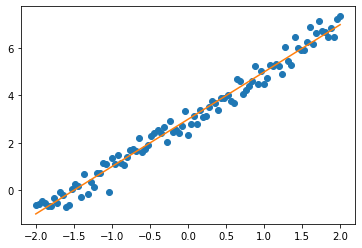

In [5]:
plt.plot(X,Y,'o')
plt.plot(X,b_0+b_1*X)

Como se puede observar estos valores de los parametros se ajustan bien a los valores esperados.

**EJEMPLO DE REGRESION CON DATOS REALES**

A continuacion desarrollamos un ejemplo en el cual analizaremos  el comportamiento de la demanda de la energia 
con respecto al crecimiento del PIB. Este ejemlo lo desarrollaremos paso pasa usando el codigo python.En este ejemplo real tambien utilizamos el algoritmo del Gradiante descendiente explicado anteriormente.

En este ejemplo utilizaremos ademas la libreria pandas de python la cual nos ayuda a importar informacion que tenemos en bases de datos existentes.

In [2]:
# ANALISIS DEL COPORTAMIENTO DE LA DEMANDA DE ENERGIA DEPENDIENDO DEL PIB


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Creamos la variable datos en la cual almacenaremos los datos que importamos del archivo consumos_csv
# con la ayuda de la libreria "pandas"

df = pd.read_csv('consumos1.csv', sep = ";") # Se carga DataFrame con Pandas en la variable df


X = list(df.iloc[:,1]) # Se extrae columna 1: PIB, se convierte de array a list
Y = list(df.iloc[:,2]) # Se extrae columna 2: Gwh, se convierte de array a list

df

#print(X,Y)

,Año,PIB,GWh
0,2000,24,18
1,2001,23,16
2,2002,26,21
3,2003,28,24
4,2004,32,28
5,2005,29,27


#LOS VALORES DE PIB estan dados en miles de millones de US  y LOS VALORES DE GHh estas dados en miles de GHh

In [3]:
# Definición de los ajustes y parámetros iniciales

num_steps = 500000
learningRate = 0.001 # generalmente tiene un valor entre cero y 1
criteria = 1e-8
b_0 = 1  # valor inicial
b_1 = 1  # valor inicial

In [4]:
# Inicializamos en cero las derivadas parciales 

for step in range(1, num_steps+1):
    
    b_0_gradient = 0
    b_1_gradient = 0
    N = float(len(X))# N=numero de puntos de X,Len calcula # elementos de X y float convierte N de entero a float.
    
    # igualmos a cero la derivadas parciales 
    
    for i in range(0, len(X)):
        b_0_gradient -= (2/N) * (Y[i] - (b_0 + b_1 * X[i]))
        b_1_gradient -= (2/N) * (Y[i] - (b_0 + b_1 * X[i])) * X[i]
        
        # los resultados de la derivadas  se multiplicada por la velocidad de aprendizaje y se le resta a cada uno
        # de los parametros.
        
    b_0 = b_0 - (learningRate * b_0_gradient)  # valor final de b_0
    b_1 = b_1 - (learningRate * b_1_gradient)  # valor final de b_1
    
    if (step % 10000) == 0:
        print(b_0,b_1)

    
    if max(abs(learningRate * b_0_gradient), abs(learningRate * b_1_gradient)) < criteria:
        break

print(b_0,b_1)
print(step)

-2.744552451141775 0.93489423385931
-5.647836226855116 1.0410657945031876
-7.903299112595766 1.123546885933732
-9.655491878424753 1.187623653783016
-11.016711124386898 1.2374027256502755
-12.074196277683264 1.2760744015031187
-12.895720696148388 1.3061171173909467
-13.533935207274682 1.3294562863825137
-14.02974245664793 1.3475876967134146
-14.41491832502056 1.3616733756296737
-14.71414841849772 1.372616062762721
-14.94661014882536 1.381117065973404
-15.127201798010674 1.3877212075987073
-15.267497337020393 1.392851741669348
-15.376488192106208 1.3968374799141492
-15.46115949795214 1.3999338650345492
-15.526937769239371 1.4023393418182664
-15.57803868152969 1.404208075303286
-15.61773725046139 1.4056598310889468
-15.648577724820502 1.4067876510151611
-15.672536645363385 1.4076638161377921
-15.691149519695253 1.408344479162335
-15.705609231695707 1.4088732632248477
-15.716842492470326 1.4092840576630414
-15.725569232507 1.4096031899561978
-15.732348741430927 1.409851113031742
-15.737615

In [5]:
# Impresión de los resultados
print("Los valores que se obtienen son:", b_0, b_1, "en pasos", step)

Los valores que se obtienen son: -15.755556331233166 1.4106998023843635 en pasos 421894


Text(0, 0.5, 'GWh en miles')

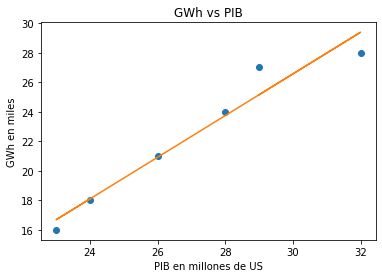

In [6]:
plt.plot(X,Y,'o')
plt.plot(X,[b_0+i*b_1 for i in X]) # Calcula el valor de Y estimado para todos los elementos en X.
# La notacion se debe a que X es list, por lo tanto no se puede multiplicar con un float, a diferencia de un array
plt.title('GWh vs PIB')
plt.xlabel('PIB en millones de US')
plt.ylabel('GWh en miles')

**CONCLUSIONES**

-El objetivo de la implemetacion de una regresion lineal es encontrar los parametros optimos para  un modelo que represente la realacion entre  las variable independientes con las varibles dependientes, para esto se utilizan metodos de optimizacion en la obtencion de estos parametros.las sumatoria de los errores( diferencia entre el valor obtenido y el valor esperado que es representado por el modelo)es el valor menor cuando calculamos este modelo con la regresion lineal.  

-El algoritmo de gradiante descendiente es un algoritmo de optimizacion muy eficiente para encontrar modelos en regresiones   lienales.

-La convergencia correcta del algorimto depende del valor asignado al radio aprendizaje(learningRate), como de el número máximo de veces que se va a iterar(num_steps).

-Es posible cuando se tiene mas de un parametro tener diferentes diferentes punto donde las derivas son cero,por lo que para determinar cual es minima correcto se usan algoritmos conicidos como de gradiante descendiente estocasticos.

-Existe diferentes metodos de gradiante desecndientes estocasticos dentro de los cuales el conocido como el algoritmo de Adams es uno de los mas eficientes. 
